# Идентификация личности по манере набора текста.
## Глава 1. Отбор параметров.
### Время удержания клавиши нажатой.

Сначала попробуем посмотреть характеризует ли пользователя длительность удержания клавиши нажатой. Для определенности условимся, что длительность удержания клавиши нажатой равна разности между временем отпускания кнопки и временем её нажатия (с учетом того, что отпускание всегда следует после нажатия).

In [8]:
from db_provider import Provider
from  models import Unit, KEY_PRESS_UNIT_TYPE, KEY_RELEASE_UNIT_TYPE
from chapter_one.utils import get_key_activation_sequence, get_average_key_activation,\
get_average_distance, get_distance_sequence

from utils import get_inputs_sequence
import matplotlib.pyplot as plt
%matplotlib inline

provider = Provider("database/research_db.sqlite3")
subjects = provider.get_all_subjects()

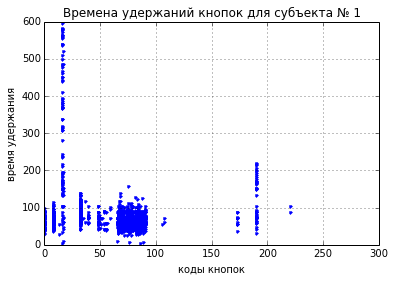

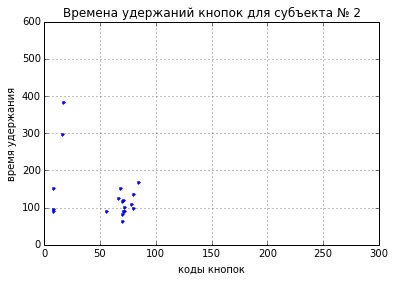

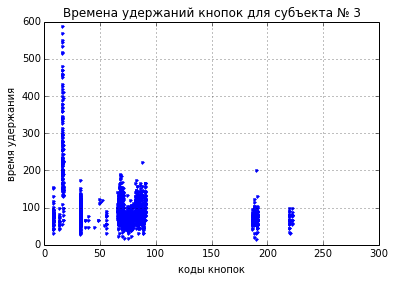

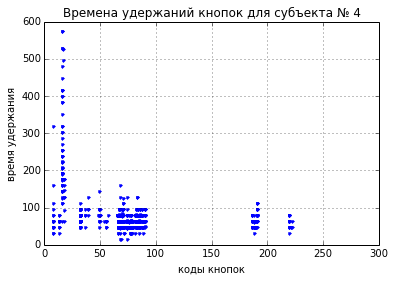

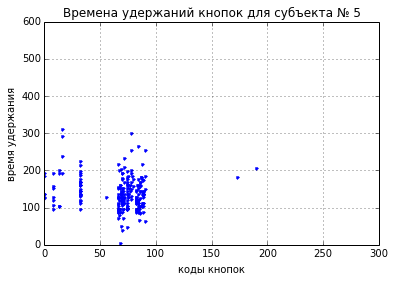

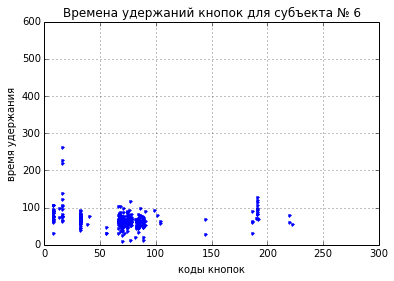

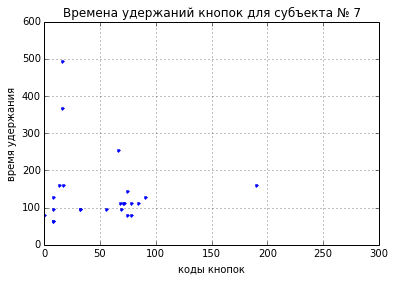

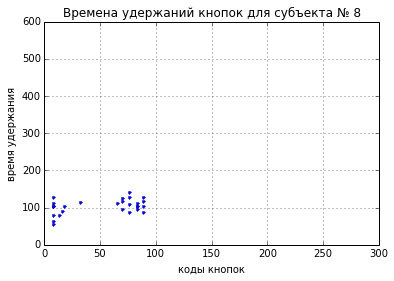

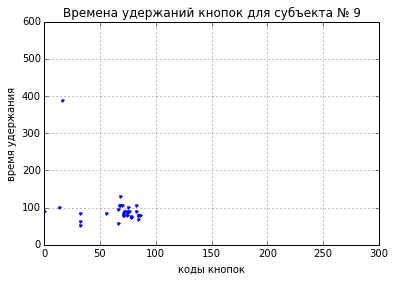

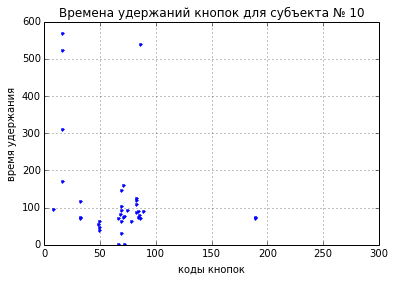

In [9]:
for subject in subjects:
    acts = get_key_activation_sequence(
        get_inputs_sequence(
            provider.get_all_units_by_subject_id(
                subject
            ),
            is_raw=True
        )
    )
    keys = []
    dur = []
    for act in acts:
        keys.append(act.key)
        dur.append(act.activity_duration)
    plt.axis([0,300,0,600])
    plt.plot(keys, dur, '.')
    plt.title("Времена удержаний кнопок для субъекта № {}".format(subject))
    plt.xlabel("коды кнопок")
    plt.ylabel("время удержания")
    plt.grid(True)
    plt.show()

Видно что каждый пользователь относительно этого параметра ведет себя приблизительно как и остальные.

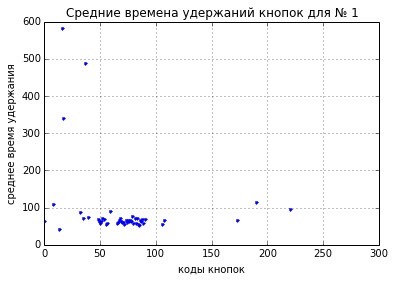

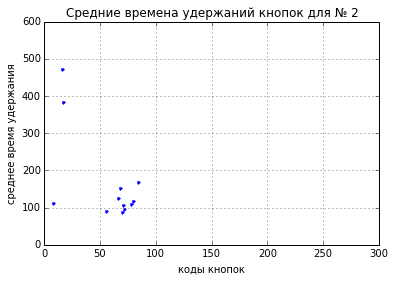

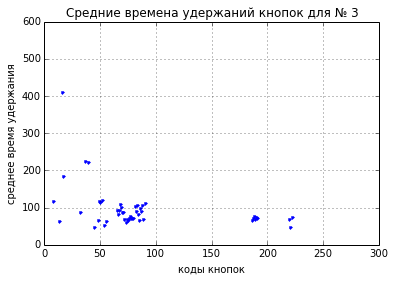

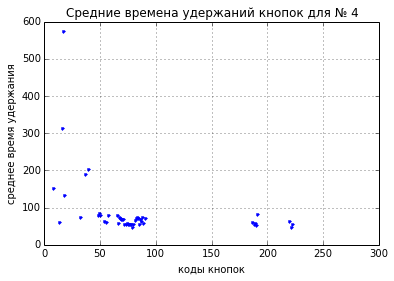

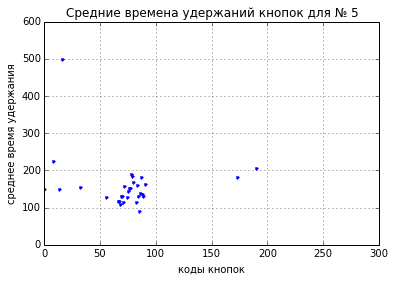

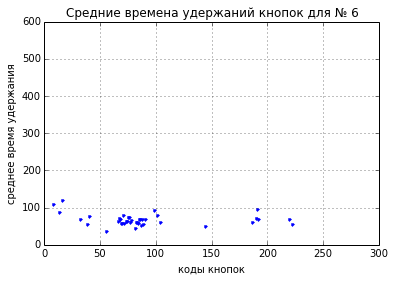

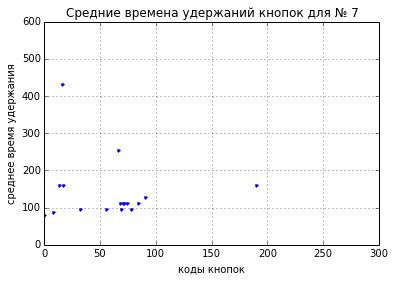

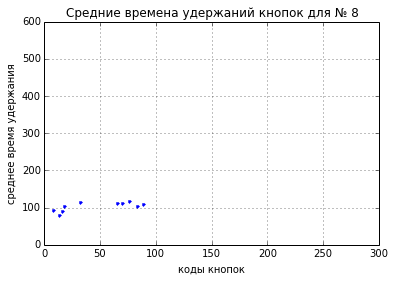

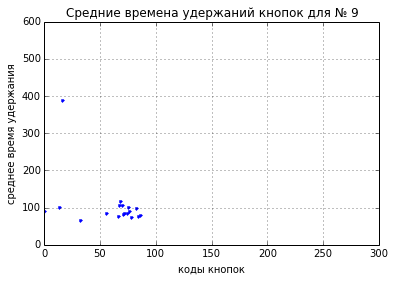

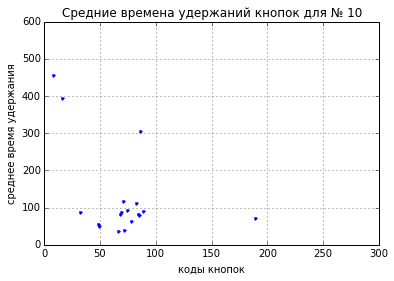

In [15]:
for subject in subjects:
    avr = get_average_key_activation(
        get_key_activation_sequence(
            get_inputs_sequence(
                provider.get_all_units_by_subject_id(
                    subject
                ),
                is_raw=True
            )
        )
    )
    plt.plot(list(avr.keys()), list(avr.values()), '.')
    plt.axis([0,300,0,600])
    plt.title("Средние времена удержаний кнопок для № {}".format(subject))
    plt.xlabel("коды кнопок")
    plt.ylabel("среднее время удержания")
    plt.grid(True)
    plt.show()

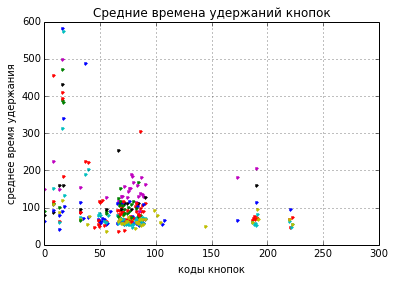

In [19]:
provider = Provider("database/research_db.sqlite3")
subjects = provider.get_all_subjects()

for subject in subjects:
    avr = get_average_key_activation(
        get_key_activation_sequence(
            get_inputs_sequence(
                provider.get_all_units_by_subject_id(
                    subject
                ),
                is_raw=True
            )
        )
    )
    plt.plot(list(avr.keys()), list(avr.values()), '.')
plt.axis([0,300,0,600])
plt.title("Средние времена удержаний кнопок")
plt.xlabel("коды кнопок")
plt.ylabel("среднее время удержания")
plt.grid(True)
plt.show()

Если рассматривать время удержания каждой клавиши в среднем, получаем, что все данные кучкуются в одной и той же области пространства. Этот параметр в чистом виде ничего толкового не даст.

### Расстояния между нажатиями.
Под расстоянием между нажатиями клавишь будем считать время прошедшее в период между отпусканием n кнопки и нажатием (n+1) кнопки. В случаях, когда (n+1) кнопка нажата до того как отпущена n, следуя вышеприведенному правилу, будем получать отрицательные расстояния.
Считать расстояния будем только в пределах одного сообщения, т.к. подсчет расстояний между концом и началом соседних сообщений скорее всего окажет только отрицательное влияние на результаты анализа.


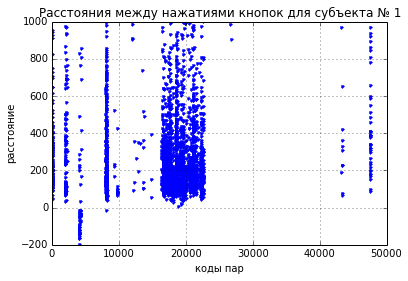

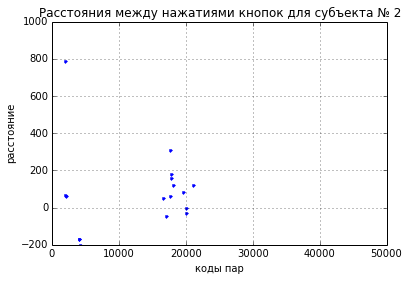

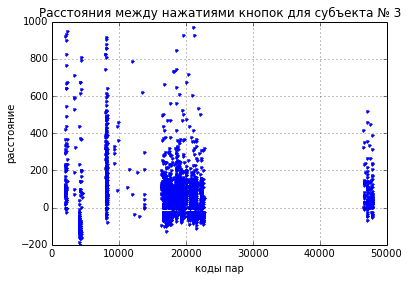

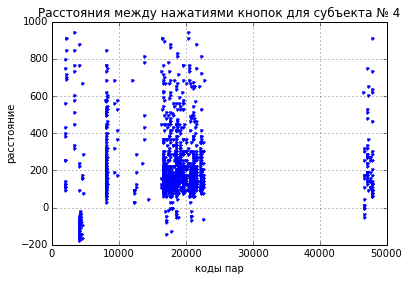

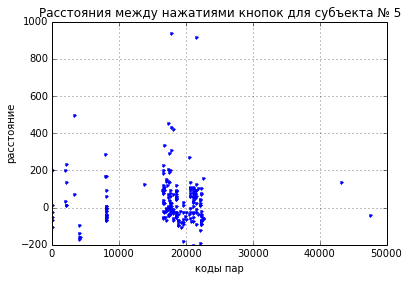

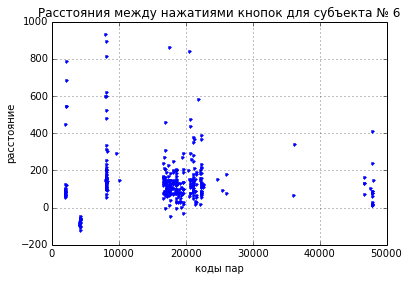

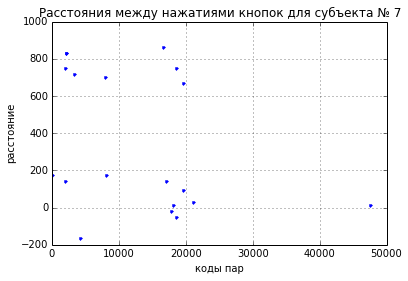

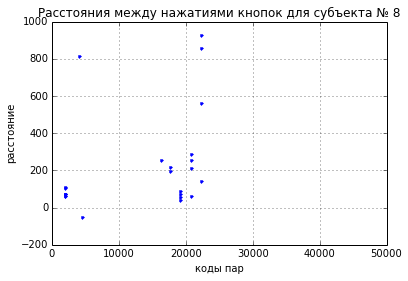

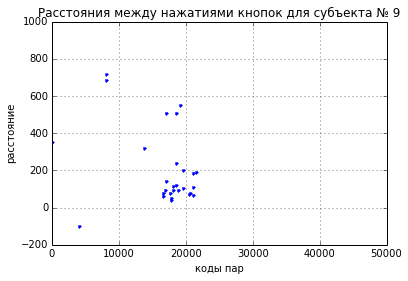

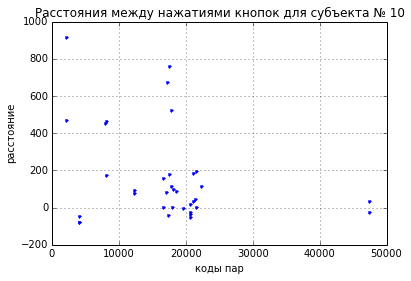

In [12]:
keys_number = 250
for subject in subjects:
    dist = get_distance_sequence(
        get_inputs_sequence(
            provider.get_all_units_by_subject_id(
                subject
            ),
            is_raw=True
        )
    )
    x = []
    y = []
    for d in dist:
        x.append(d.key_code_from * keys_number + d.key_code_to)
        y.append(d.distance)
    plt.axis([0,50000,-200,1000])
    plt.plot(x, y, '.')
    plt.title("Расстояния между нажатиями кнопок для субъекта № {}".format(subject))
    plt.xlabel("коды пар")
    plt.ylabel("расстояние")
    plt.grid(True)
    plt.show()

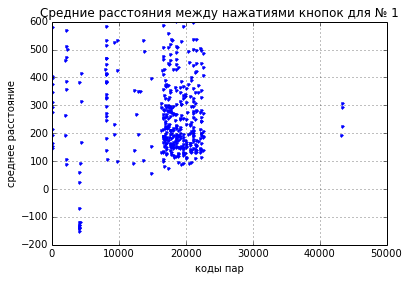

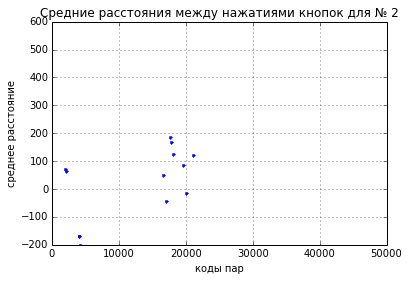

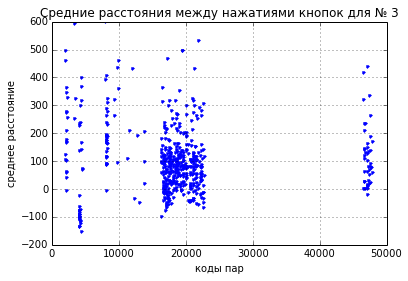

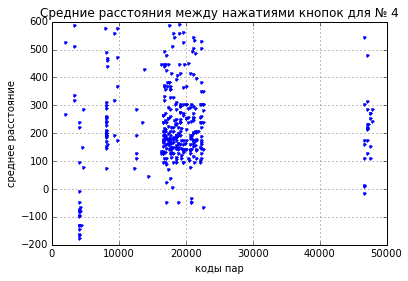

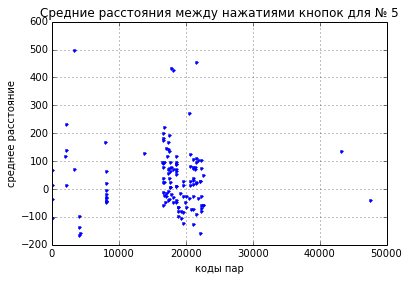

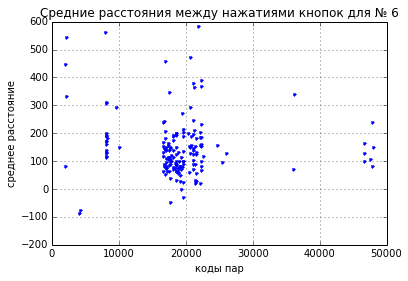

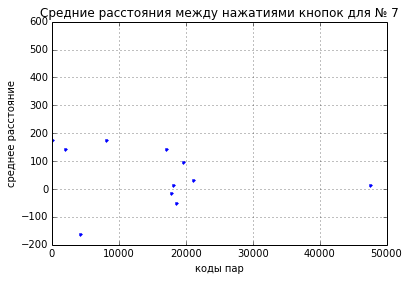

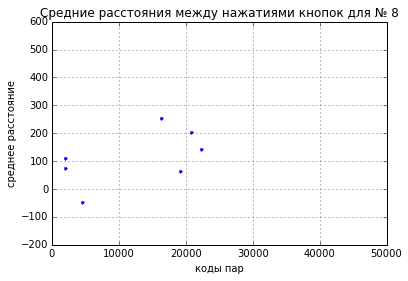

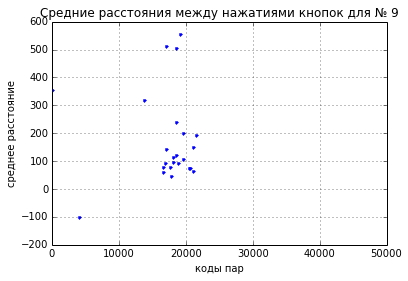

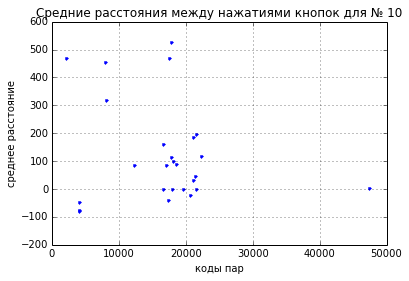

In [13]:
keys_number = 250
for subject in subjects:
    avr = get_average_distance(
        get_distance_sequence(
            get_inputs_sequence(
                provider.get_all_units_by_subject_id(
                    subject
                ),
                is_raw=True
            )
        )
    )
    x=[]
    for t in avr.keys():
        x.append(t[0]*keys_number + t[1])
    plt.plot(x, list(avr.values()), '.')
    plt.axis([0,50000,-200,600])
    plt.title("Средние расстояния между нажатиями кнопок для № {}".format(subject))
    plt.xlabel("коды пар")
    plt.ylabel("среднее расстояние")
    plt.grid(True)
    plt.show()

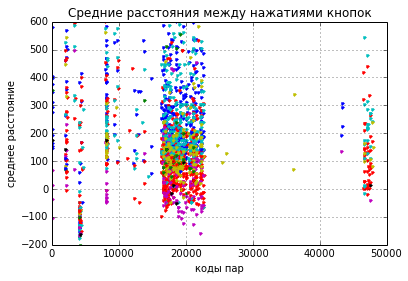

In [14]:
keys_number = 250
for subject in subjects:
    avr = get_average_distance(
        get_distance_sequence(
            get_inputs_sequence(
                provider.get_all_units_by_subject_id(
                    subject
                ),
                is_raw=True
            )
        )
    )
    x=[]
    for t in avr.keys():
        x.append(t[0]*keys_number + t[1])
    plt.plot(x, list(avr.values()), '.')
plt.axis([0,50000,-200,600])
plt.title("Средние расстояния между нажатиями кнопок")
plt.xlabel("коды пар")
plt.ylabel("среднее расстояние")
plt.grid(True)
plt.show()